# _PRML Minor Project_
### _Online Retail Clustering_
Vansh Agarwal B21AI042 <BR>
Navneet Meena B21CS051


### _Data Preprocessing & Visualisation_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

data = pd.read_csv('./OnlineRetail.csv', encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Handling missing values
Customer ID column has a lot of missing values which are not useful for the purpose of clustering. These are therefore dropped

In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data = data.dropna().reset_index(drop=True)
data["TotalPrice"] = data["Quantity"]*data["UnitPrice"]
data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


### Country-wise contribution towards total revenue
Country wise revenue generation has been plotted using bar graph. United Kingdom has the most significant contribution.

<AxesSubplot: xlabel='Country', ylabel='TotalPrice'>

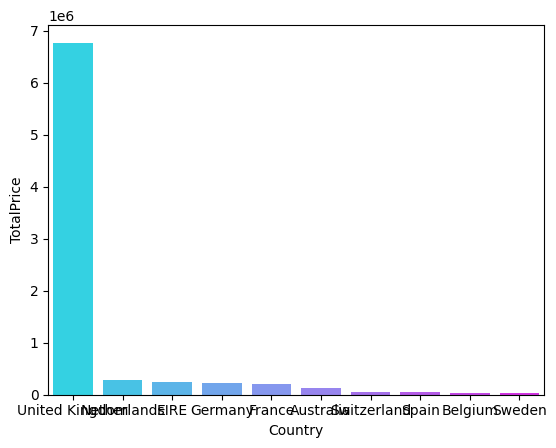

In [5]:
countrybase_retail = data.groupby(['Country']).agg(
    InvoiceCount = ('InvoiceNo', 'count'),
    QuantityCount = ('Quantity', 'count'),
    TotalPrice = ('TotalPrice', 'sum'),
    Customers = ('CustomerID', 'count')
).reset_index()
countrybase_retail.sort_values('TotalPrice', ascending=False, inplace=True, ignore_index=True)

sns.barplot(countrybase_retail.head(10), x = "Country", y = "TotalPrice", palette="cool")

###  Feature Selection & Engineering
Irrelevant features are dropped. Samples showing returned items (those having unitPrice or Qty  < 0) are dropped as they are not useful for the purpose of clustering. Total Price = Unit Price * Qty is added. Customer wise Total Price and Freqency is determined.

In [6]:
data.drop(['StockCode', 'InvoiceDate','Description','Country'],axis = 1, inplace =True)

In [7]:
data = data[data["Quantity"] > 0] 
data = data[data['UnitPrice'] > 0]
data.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [8]:

Amt = data.groupby('CustomerID')['TotalPrice'].sum()
Amt = Amt.reset_index()
Amt.columns = ['CustomerID', 'Amount']

frq = data.groupby('CustomerID')['InvoiceNo'].count()
frq = frq.reset_index()
frq.columns = ['CustomerID', 'Frequency']

df1 = pd.merge(Amt, frq, on='CustomerID', how='inner')
df1.describe()


,CustomerID,Amount,Frequency
count,4338.000000,4338.000000,4338.000000
mean,15300.408022,2054.266460,91.720609
std,1721.808492,8989.230441,228.785094
min,12346.000000,3.750000,1.000000
25%,13813.250000,307.415000,17.000000
50%,15299.500000,674.485000,41.000000
75%,16778.750000,1661.740000,100.000000
max,18287.000000,280206.020000,7847.000000


### Outlier Detection
Outlier Detection has been done using _Box Plot & Isolation Forest_.

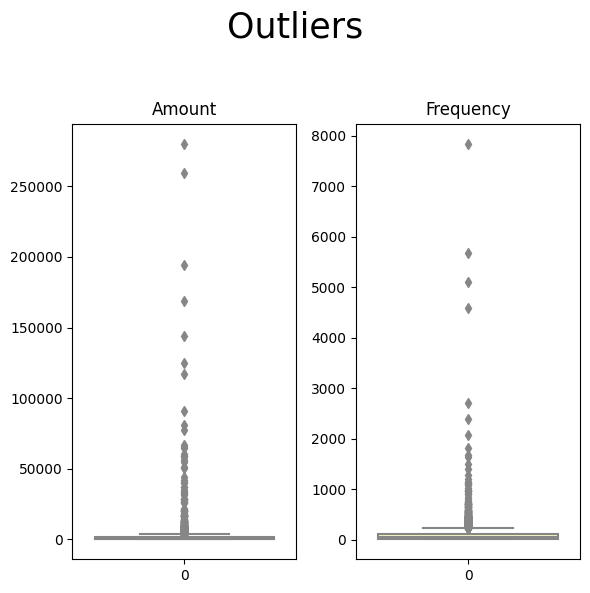

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral', color='red').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

Total number of outliers is: 434


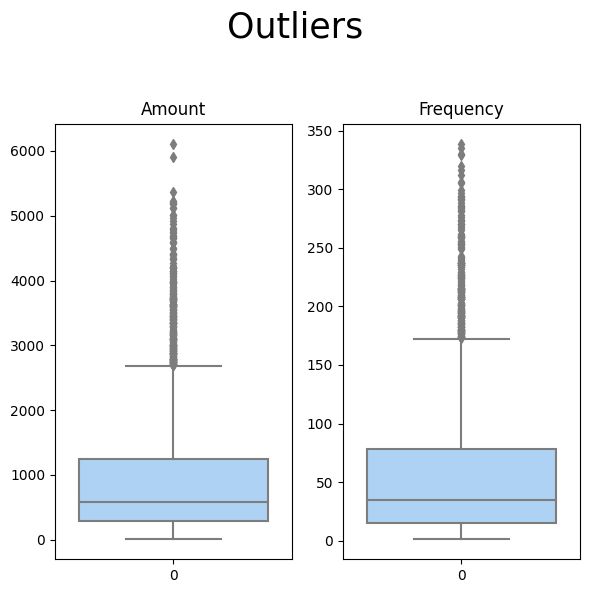

In [10]:
from sklearn.ensemble import IsolationForest
df2 = df1.copy()

model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2)

scores=model.decision_function(df2)
anomaly=model.predict(df2)

df2['scores']=scores
df2['anomaly']=anomaly

anomaly = df2.loc[df2['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

df2 = df2.drop(anomaly_index, axis = 0).reset_index(drop=True)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df2['Amount'], color="#a2d2ff").set_title("Amount")
sns.boxplot(ax=axes[1], data=df2['Frequency'], color="#a2d2ff").set_title("Frequency")

plt.tight_layout()


### Standard Scaling
Scaling is necessary because the large range features might have undue influence on the cluster formation.

In [11]:
df2.drop(['scores', 'anomaly'], axis = 1, inplace =True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = scaler.fit_transform(df2)

df3 = pd.DataFrame(df3, columns=df2.columns)

### Optimal Number of Clusters
Optimal number of clusters is found using <br>
* Elbow Method
* Silhouette Analysis <br>
##### __Optimal value of k = 5 or 6.__

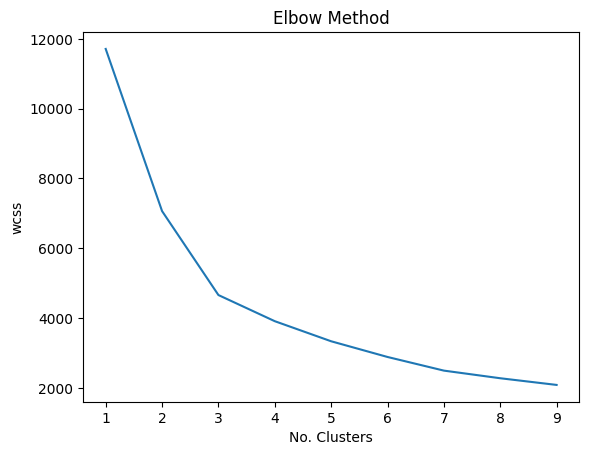

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(df3)
    wcss.append(model.inertia_)

plt.plot(range(1, 10), wcss)
plt.title("Elbow Method")
plt.xlabel("No. Clusters")
plt.ylabel("wcss")
plt.show()


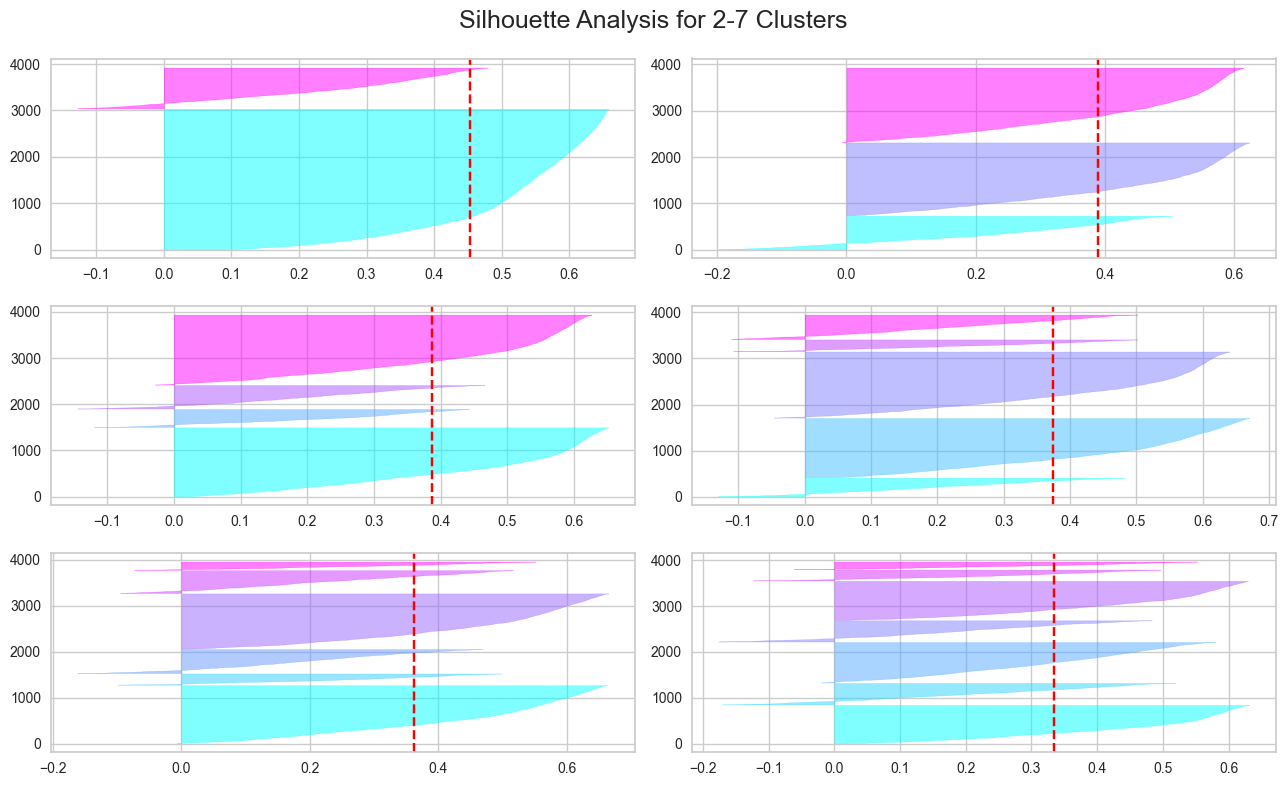

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='cool', ax=ax[q-1][mod])
    visualizer.fit(df3)


In [14]:
df = df3.drop(columns = "CustomerID", axis=1)

### KMeans 

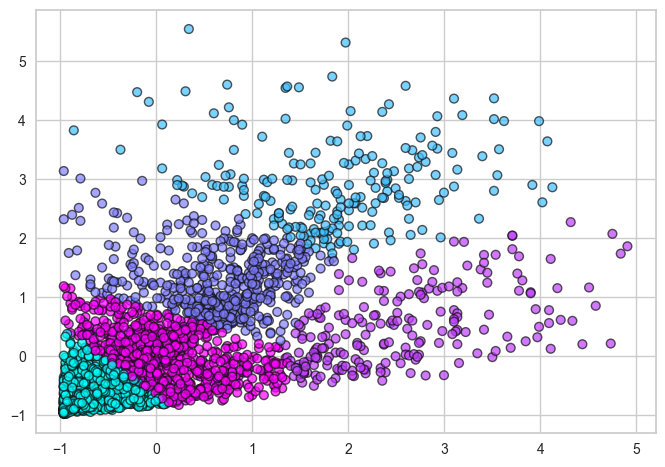

In [15]:
from sklearn.cluster import KMeans
Kmean =KMeans(n_clusters=5)
Kmean.fit(df)
y_preds = Kmean.predict(df)

plt.scatter(df["Frequency"], df["Amount"], c=y_preds, s=40, cmap='cool', edgecolors='k', alpha=0.7, linewidths=1)

### Silhouette Score for KMeans

In [16]:
from sklearn import metrics
sse = metrics.silhouette_score(df, Kmean.labels_, metric="euclidean")
print("The SSE Score for KMeans model is {}".format(round(sse, 4)))


The SSE Score for KMeans model is 0.4739


### Heirarchial Clustering

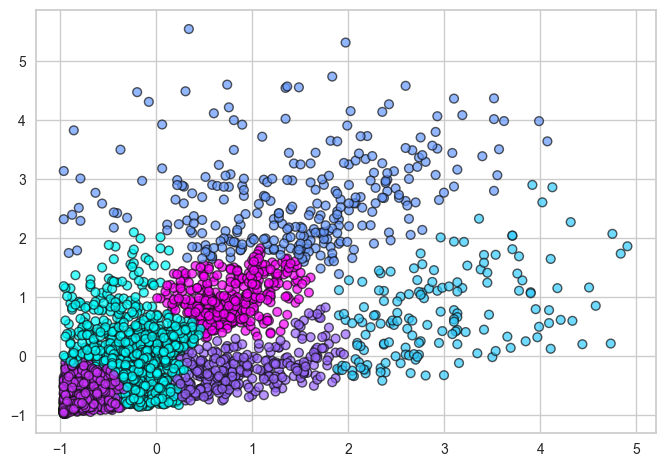

In [17]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6, distance_threshold=None).fit(df)

plt.scatter(df["Frequency"], df["Amount"], c=model.labels_, s=40, cmap='cool', edgecolors='k', alpha=0.7, linewidths=1)

### Silhouette Score for Agglomerative Clustering

In [18]:
from sklearn import metrics
sse = metrics.silhouette_score(df, model.labels_, metric="euclidean")
print("The SSE Score for Agglomerative model is {}".format(round(sse, 4)))


The SSE Score for Agglomerative model is 0.4255


### DBSCAN

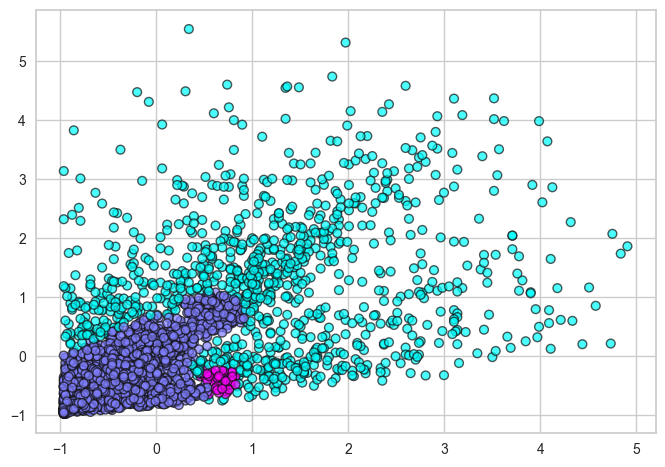

In [19]:
from sklearn.cluster import DBSCAN
model_dbs = DBSCAN(eps = 0.2, min_samples = 50).fit(df)

plt.scatter(df["Frequency"], df["Amount"], c=model_dbs.labels_, s=40, cmap='cool', edgecolors='k', alpha=0.7, linewidths=1)


### Silhouette Score for DBSCAN

In [20]:
from sklearn import metrics
sse = metrics.silhouette_score(df, model_dbs.labels_, metric="euclidean")
print("The SSE Score for DBSCAN model is {}".format(round(sse, 4)))


The SSE Score for DBSCAN model is 0.278
